### Initializing and Starting Pyspark Session

In [1]:
from pyspark.sql import SparkSession;
from pyspark.context import SparkContext;

# warehouse_location points to the default location for managed databases and tables
from os.path import abspath
warehouse_location = abspath('spark-warehouse')

spark = SparkSession \
    . builder \
    .master("local[*]") \
    .appName("ISM6562 PySpark Tutorials") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .enableHiveSupport() \
    .getOrCreate()

sc =spark.sparkContext
sc.setLogLevel("ERROR") # only display errors (not warnings)

# note: If you have multiple spark sessions running (like from a previous notebook you've run), 
# this spark session webUI will be on a different port than the default (4040). One way to 
# identify this part is with the following line. If there was only one spark session running, 
# this will be 4040. If it's higher, it means there are still other spark sesssions still running.
spark_session_port = spark.sparkContext.uiWebUrl.split(":")[-1]
print("Spark Session WebUI Port: " + spark_session_port)

23/11/08 15:11:09 WARN Utils: Your hostname, localhost.localdomain resolves to a loopback address: 127.0.0.1; using 10.21.10.132 instead (on interface eth0)
23/11/08 15:11:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/08 15:11:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Session WebUI Port: 4040


In [2]:
spark

### Importing Libraries and reading csv files

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/Credit_Card_Default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Create dataframe in Spark

In [5]:
df_spark = spark.createDataFrame(df)
df_spark.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [6]:
df_spark.printSchema()

root
 |-- ID: long (nullable = true)
 |-- LIMIT_BAL: long (nullable = true)
 |-- SEX: long (nullable = true)
 |-- EDUCATION: long (nullable = true)
 |-- MARRIAGE: long (nullable = true)
 |-- AGE: long (nullable = true)
 |-- PAY_0: long (nullable = true)
 |-- PAY_2: long (nullable = true)
 |-- PAY_3: long (nullable = true)
 |-- PAY_4: long (nullable = true)
 |-- PAY_5: long (nullable = true)
 |-- PAY_6: long (nullable = true)
 |-- BILL_AMT1: long (nullable = true)
 |-- BILL_AMT2: long (nullable = true)
 |-- BILL_AMT3: long (nullable = true)
 |-- BILL_AMT4: long (nullable = true)
 |-- BILL_AMT5: long (nullable = true)
 |-- BILL_AMT6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: long (nullable = true)
 |-- default payment next month: long (nullable = true)



### Data Description

In [7]:
df2 = df_spark.toPandas()
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Adding Data to the PySpark Datawarehouse

In [8]:
spark.catalog.listTables() # tables already exists in the spark warehouse

[Table(name='fake_friends', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='movieratings', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='movies', catalog='spark_catalog', namespace=['default'], description=None, tableType='MANAGED', isTemporary=False)]

In [9]:
db=spark.sql("show databases")
db.show() # shows current databases present in the warehouse. 

+-------------+
|    namespace|
+-------------+
|bd_project_db|
|      default|
|       w10_db|
+-------------+



In [10]:
tables=spark.sql("show tables").show()

+---------+------------+-----------+
|namespace|   tableName|isTemporary|
+---------+------------+-----------+
|  default|fake_friends|      false|
|  default|movieratings|      false|
|  default|      movies|      false|
+---------+------------+-----------+



In [11]:
creditdefault=spark.read.csv("data/Credit_Card_Default.csv", header=True, inferSchema=True);
creditdefault.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [12]:
creditdefault.createOrReplaceTempView("credit_tmp_view")

In [13]:
# Get 5 rows using temp view created.
q1=spark.sql("SELECT * FROM credit_tmp_view;")
q1.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

In [14]:
# list the tables present in the warehouse
tables=spark.sql("show tables").show()

+---------+---------------+-----------+
|namespace|      tableName|isTemporary|
+---------+---------------+-----------+
|  default|   fake_friends|      false|
|  default|   movieratings|      false|
|  default|         movies|      false|
|         |credit_tmp_view|       true|
+---------+---------------+-----------+



In [15]:
type(creditdefault)

pyspark.sql.dataframe.DataFrame

In [16]:
# add the credit data to the database in warehouse, after creating a new database named "BD_Project_DB"

spark.sql("CREATE DATABASE IF NOT EXISTS bd_project_db;")

DataFrame[]

In [17]:
creditdefault.write.mode("overwrite").saveAsTable("bd_project_db.creditdefault")

### Perform SQL Operation to list and get the first 5 rows from the warehouse

In [18]:
spark.catalog.listTables("bd_project_db")

[Table(name='creditdefault', catalog='spark_catalog', namespace=['bd_project_db'], description=None, tableType='MANAGED', isTemporary=False),
 Table(name='credit_tmp_view', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [19]:
q2=spark.sql("SELECT * FROM bd_project_db.creditdefault;").show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|default payment next month|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|                         1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|  

### Data Cleaning

In [20]:
creditdefault.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- default payment next month: inte

In [21]:
df=creditdefault

In [22]:
from pyspark.sql.functions import when

# Gender (SEX) mapping
gender_mapping = {1: "male", 2: "female"}
df = df.withColumn("SEX", when(df["SEX"] == 1, "male").otherwise("female"))

# Education (EDUCATION) mapping
education_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others",
    5: "unknown",
    6: "unknown"
}
df = df.withColumn("EDUCATION", when(df["EDUCATION"] == 1, "graduate school").when(df["EDUCATION"] == 2, "university").when(df["EDUCATION"] == 3, "high school").when(df["EDUCATION"] == 4, "others").when(df["EDUCATION"] == 5, "unknown").when(df["EDUCATION"] == 6, "unknown").otherwise("unknown"))

# Marriage (MARRIAGE) mapping
marriage_mapping = {1: "married", 2: "single", 3: "others"}
df = df.withColumn("MARRIAGE", when(df["MARRIAGE"] == 1, "married").when(df["MARRIAGE"] == 2, "single").otherwise("others"))

In [23]:
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# Rename columns PAY_0 to PAY_1 and default payment next month to def_pay
# We can also use 'df.selectExpr' 

df = df.withColumnRenamed('PAY_0', 'PAY_1').withColumnRenamed('default payment next month', 'def_pay')
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
type(df)

pyspark.sql.dataframe.DataFrame

In [26]:
from pyspark.sql.functions import col,isnan, when, count

# Check for null values in each column
null_counts = df.select([count(when(isnan(c), c)).alias(c) for c in df.columns])

# Show the counts of null values in each column
null_counts.show()

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|def_pay|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|  0|        0|  0|        0|       0|  0|    0|    0|    0|    0|    0|    0|        0|        0|        0|        0|        0|        0|       0|       0|       0|       0|       0|       0|      0|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+----

### Data Exploration

In [27]:
# For the 'SEX' column
sex_counts = df.groupBy("SEX").count()
sex_counts.show()

# For the 'MARRIAGE' column
marriage_counts = df.groupBy("MARRIAGE").count()
marriage_counts.show()

# For the 'EDUCATION' column
education_counts = df.groupBy("EDUCATION").count()
education_counts.show()

+------+-----+
|   SEX|count|
+------+-----+
|female|18112|
|  male|11888|
+------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|  others|  377|
| married|13659|
|  single|15964|
+--------+-----+

+---------------+-----+
|      EDUCATION|count|
+---------------+-----+
|     university|14030|
|        unknown|  345|
|         others|  123|
|graduate school|10585|
|    high school| 4917|
+---------------+-----+



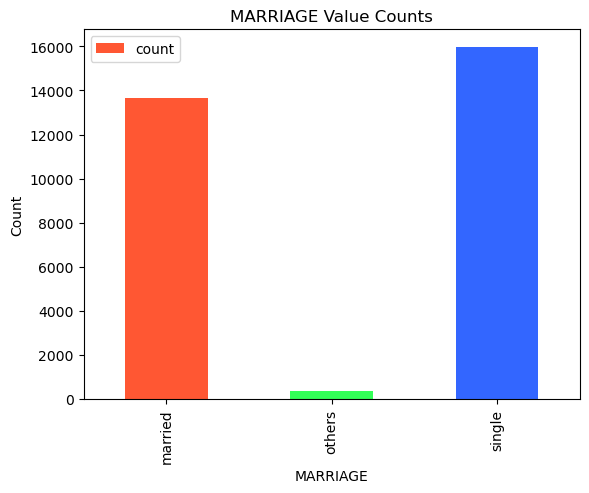

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of unique values in the 'MARRIAGE' column
marriage_counts = df.groupBy("MARRIAGE").count().orderBy("MARRIAGE")

# Convert the result to a Pandas DataFrame for plotting
marriage_counts_df = marriage_counts.toPandas()

# Define a custom color palette for the bars
colors = ['#FF5733', '#33FF57', '#3366FF']

# Create a bar plot with custom colors
marriage_counts_df.plot(kind='bar', x='MARRIAGE', y='count', color=colors)
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.title('MARRIAGE Value Counts')
plt.show()

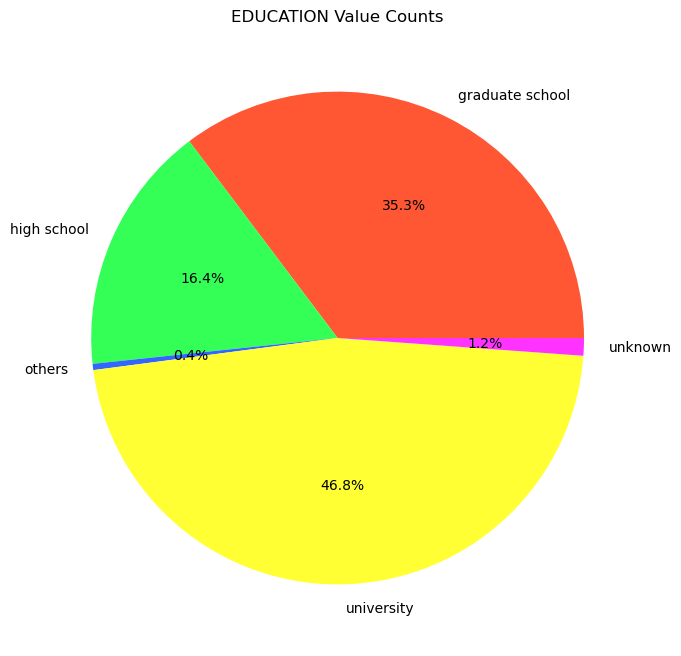

In [29]:
education_counts = df.groupBy('EDUCATION').count().orderBy('EDUCATION')

# Convert the result to a Pandas DataFrame for plotting
education_counts_df = education_counts.toPandas()

education_colors = ['#FF5733', '#33FF57', '#3366FF', '#FFFF33', '#FF33FF', '#33FFFF']

# Create a pie chart for 'EDUCATION' with custom colors
plt.figure(figsize=(8, 8))
plt.pie(education_counts_df['count'], labels=education_counts_df['EDUCATION'], autopct='%1.1f%%', colors=education_colors)
plt.title('EDUCATION Value Counts')
plt.show()

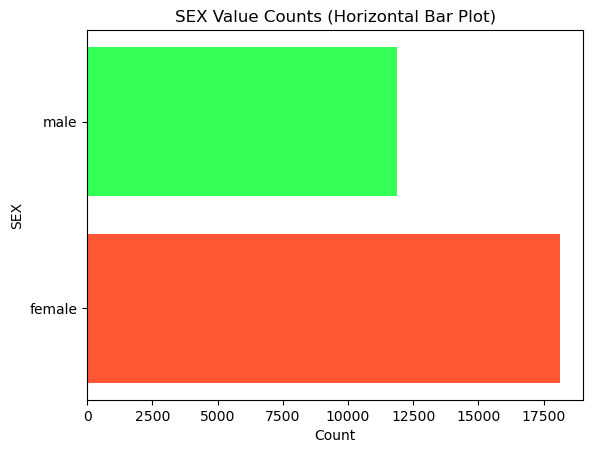

In [30]:
# Count the occurrences of unique values in the 'SEX' column
sex_counts = df.groupBy("SEX").count().orderBy("SEX")

# Convert the result to a Pandas DataFrame for plotting
sex_counts_df = sex_counts.toPandas()

# Define custom colors for the horizontal bar plot
colors = ['#FF5733', '#33FF57']

# Create a horizontal bar plot for 'SEX' with custom colors
plt.barh(sex_counts_df['SEX'], sex_counts_df['count'], color=colors)
plt.ylabel('SEX')
plt.xlabel('Count')
plt.title('SEX Value Counts (Horizontal Bar Plot)')
plt.show()

### Outlier Presence and Elimination

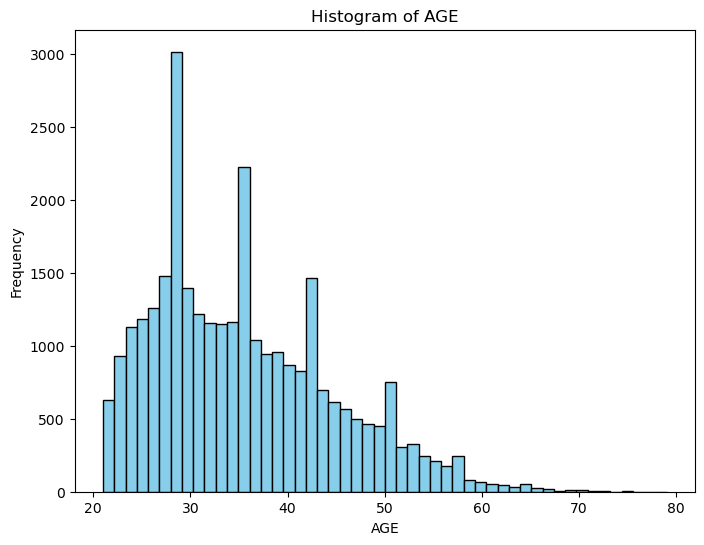

In [31]:
# In this code, we first select the 'AGE' column from your DataFrame and convert it to a Pandas DataFrame. 
# Then, we use Matplotlib to create a histogram of the 'AGE' values.


age_df = df.select("AGE").toPandas()

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(age_df['AGE'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Histogram of AGE')
plt.show()

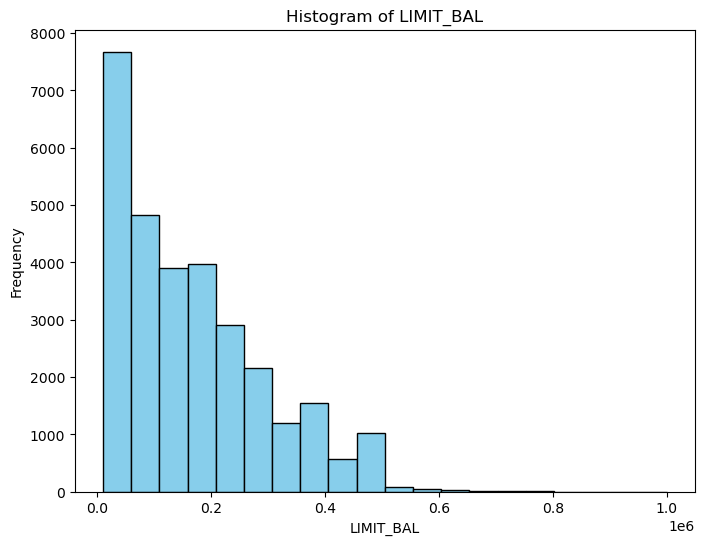

In [32]:
# Select the 'LIMIT_BAL' column and convert it to a Pandas DataFrame
limit_bal_df = df.select('LIMIT_BAL').toPandas()

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
limit_bal_df['LIMIT_BAL'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.title('Histogram of LIMIT_BAL')
plt.show()

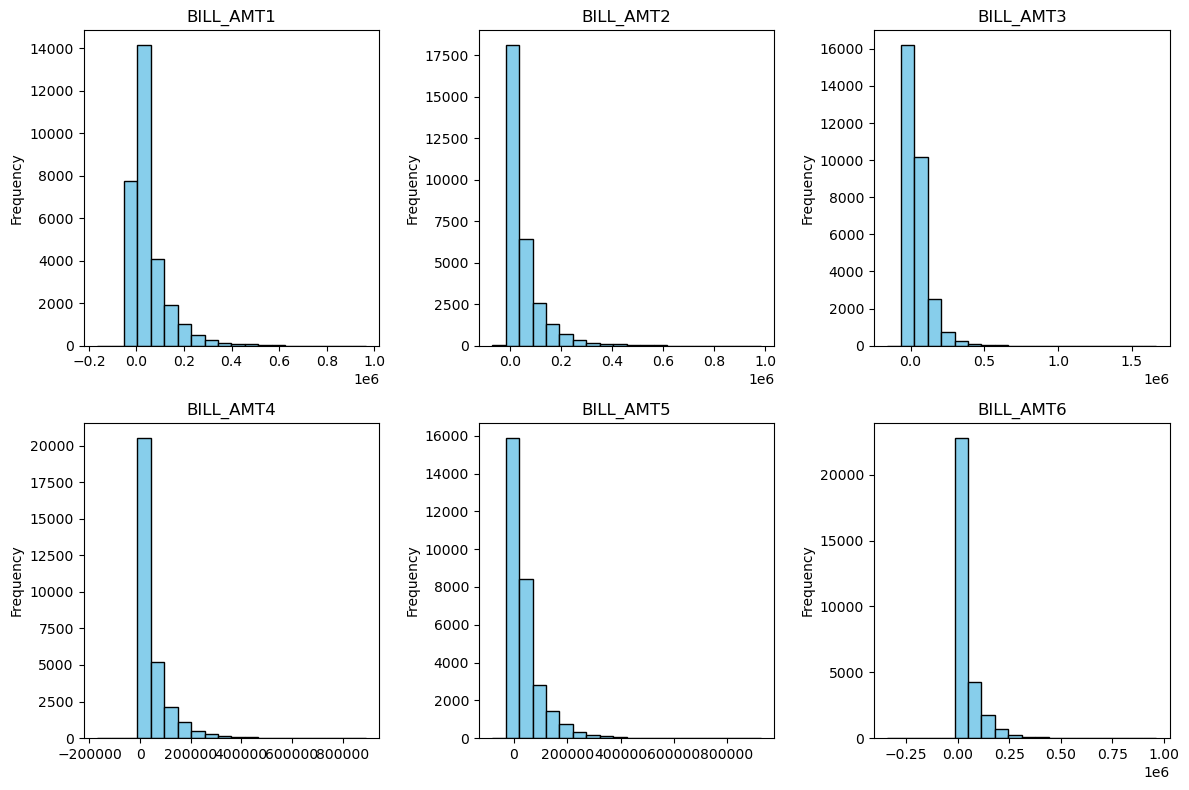

In [33]:
# Histogram plot for Bills amount

def draw_histograms(df, variables, n_rows, n_cols, n_bins, color):
    fig = plt.figure(figsize=(12, 8))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        
        # Select the column from the DataFrame and convert it to a Pandas DataFrame
        var_df = df.select(var_name).toPandas()
        
        # Create a histogram for the selected column
        var_df[var_name].plot.hist(bins=n_bins, color=color, edgecolor='black', ax=ax)
        ax.set_title(var_name)
    
    fig.tight_layout()
    plt.show()

# Select the columns you want to create histograms for
bills = df.select('BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')

# Specify the number of rows, columns, and bins
draw_histograms(bills, bills.columns, 2, 3, 20, 'skyblue')

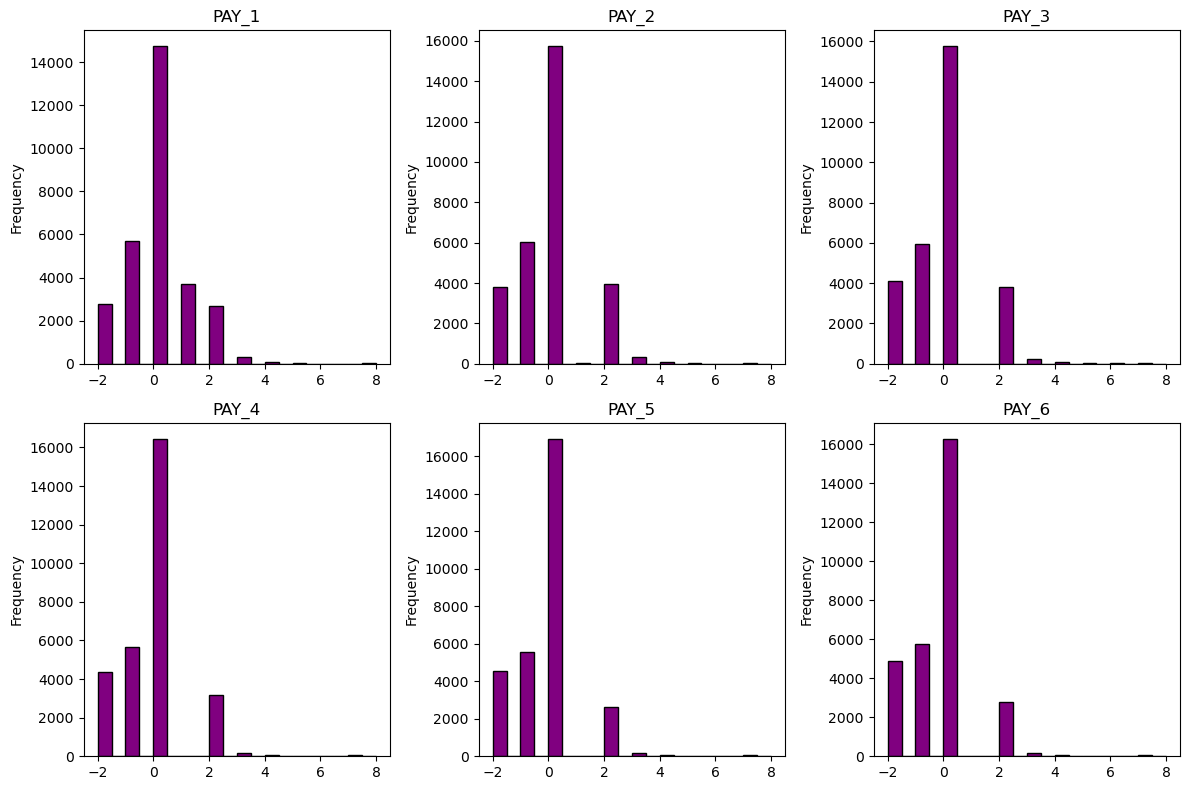

In [34]:
# Histogram plot for repayment amount paid by the each user 

pay_df = df.select('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')
draw_histograms(pay_df, pay_df.columns, 2, 3, 20, 'purple')

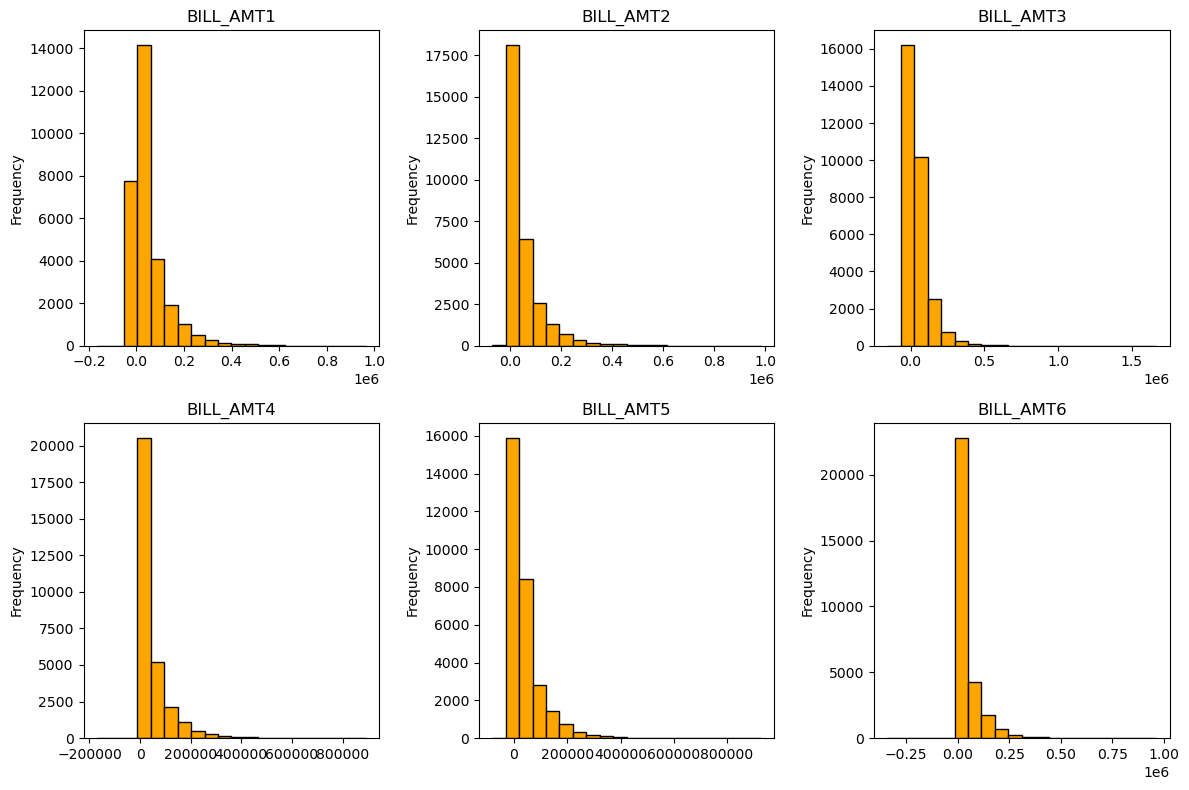

In [35]:
# histogram distribution plot for previous payment

pay_amt_df = df.select('BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')
draw_histograms(pay_amt_df, pay_amt_df.columns, 2, 3, 20, 'orange')

In [36]:
def calculate_bounds(df):
    bounds = {
        c: dict(
            zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
        )
        for c,d in zip(df.columns, df.dtypes) if d[1] == "int"
    }

    for c in bounds:
        iqr = bounds[c]['q3'] - bounds[c]['q1']
        bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
        bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

    return bounds


bounds=calculate_bounds(df)

In [37]:
# Display the calculated bounds
for col, col_bounds in bounds.items():
    print(f"Bounds for {col}: {col_bounds}")

Bounds for ID: {'q1': 7500.0, 'q3': 22500.0, 'min': -15000.0, 'max': 45000.0}
Bounds for LIMIT_BAL: {'q1': 50000.0, 'q3': 240000.0, 'min': -235000.0, 'max': 525000.0}
Bounds for AGE: {'q1': 28.0, 'q3': 41.0, 'min': 8.5, 'max': 60.5}
Bounds for PAY_1: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_2: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_3: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_4: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_5: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for PAY_6: {'q1': -1.0, 'q3': 0.0, 'min': -2.5, 'max': 1.5}
Bounds for BILL_AMT1: {'q1': 3558.0, 'q3': 67090.0, 'min': -91740.0, 'max': 162388.0}
Bounds for BILL_AMT2: {'q1': 2984.0, 'q3': 64004.0, 'min': -88546.0, 'max': 155534.0}
Bounds for BILL_AMT3: {'q1': 2664.0, 'q3': 60164.0, 'min': -83586.0, 'max': 146414.0}
Bounds for BILL_AMT4: {'q1': 2326.0, 'q3': 54503.0, 'min': -75939.5, 'max': 132768.5}
Bounds for BILL_AMT5:

### Data Cleaning - 2

In [38]:
df.toPandas()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [39]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# List of categorical columns
categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"]

# Create a list of StringIndexers and a list of output column names
indexers = [StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index") for col_name in categorical_columns]
output_cols = [indexer.getOutputCol() for indexer in indexers]

# Create a pipeline to index all categorical columns
pipeline = Pipeline(stages=indexers)

# Fit and transform the DataFrame
model = pipeline.fit(df)
df = model.transform(df)

# Show the resulting DataFrame with numerical values in the same columns
df.show()


+---+---------+------+---------------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+---------+---------------+--------------+
| ID|LIMIT_BAL|   SEX|      EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|def_pay|SEX_index|EDUCATION_index|MARRIAGE_index|
+---+---------+------+---------------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+---------+---------------+--------------+
|  1|    20000|female|     university| married| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|      0.0|            0.0|           1

In [40]:
from pyspark.sql.functions import col

# Drop the original categorical columns
df = df.drop("SEX", "EDUCATION", "MARRIAGE")

# Rename the indexed columns
df = df.withColumnRenamed("SEX_index", "SEX")
df = df.withColumnRenamed("MARRIAGE_index", "MARRIAGE")
df = df.withColumnRenamed("EDUCATION_index", "EDUCATION")



In [41]:
df.toPandas().head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SEX,EDUCATION,MARRIAGE
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,689,0,0,0,0,1,0.0,0.0,1.0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,1000,1000,1000,0,2000,1,0.0,0.0,0.0
2,3,90000,34,0,0,0,0,0,0,29239,...,1518,1500,1000,1000,1000,5000,0,0.0,0.0,0.0
3,4,50000,37,0,0,0,0,0,0,46990,...,2000,2019,1200,1100,1069,1000,0,0.0,0.0,1.0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,2000,36681,10000,9000,689,679,0,1.0,0.0,1.0


In [42]:
df=creditdefault

In [43]:
# Show the value counts after replacement
df.groupBy("EDUCATION").count().show()
df.groupBy("MARRIAGE").count().show()

+---------+-----+
|EDUCATION|count|
+---------+-----+
|        1|10585|
|        6|   51|
|        3| 4917|
|        5|  280|
|        4|  123|
|        2|14030|
|        0|   14|
+---------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       1|13659|
|       3|  323|
|       2|15964|
|       0|   54|
+--------+-----+



In [44]:
from pyspark.sql.functions import when

# Replace values in the EDUCATION column
df = df.withColumn("EDUCATION", when((df["EDUCATION"] == 5) | (df["EDUCATION"] == 6) | (df["EDUCATION"] == 0), 4).otherwise(df["EDUCATION"]))

# Replace values in the MARRIAGE column
df = df.withColumn("MARRIAGE", when(df["MARRIAGE"] == 0, 3).otherwise(df["MARRIAGE"]))

# Show the value counts after replacement
df.groupBy("EDUCATION").count().show()
df.groupBy("MARRIAGE").count().show()


+---------+-----+
|EDUCATION|count|
+---------+-----+
|        1|10585|
|        3| 4917|
|        4|  468|
|        2|14030|
+---------+-----+

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       1|13659|
|       3|  377|
|       2|15964|
+--------+-----+



In [45]:
# Rename columns PAY_0 to PAY_1 and default payment next month to def_pay
# We can also use 'df.selectExpr' 

df = df.withColumnRenamed('PAY_0', 'PAY_1').withColumnRenamed('default payment next month', 'def_pay')
df.toPandas().head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Figure size 640x480 with 0 Axes>

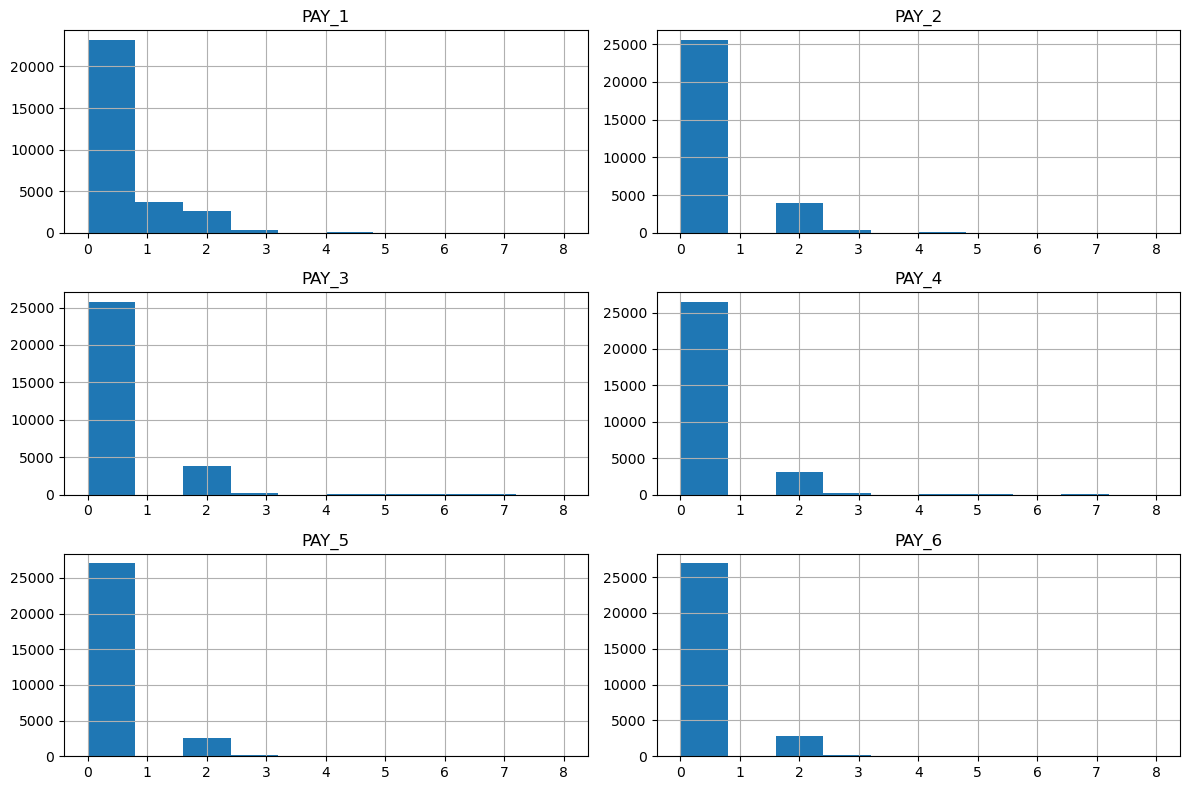

In [46]:
from pyspark.sql.functions import when
import matplotlib.pyplot as plt

# Define the columns to clean and plot
late_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Replace values in the specified columns
for col in late_columns:
    df = df.withColumn(col, when((df[col] == -2) | (df[col] == -1) | (df[col] == 0), 0).otherwise(df[col]))

# Show histograms for the specified columns
late = df[late_columns].toPandas()
fig = plt.figure()
late.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

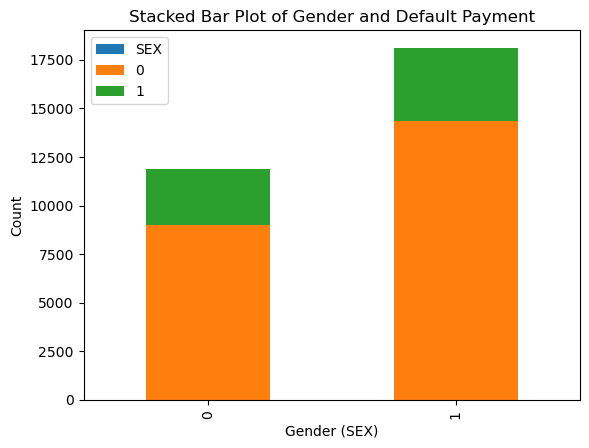

In [47]:
import matplotlib.pyplot as plt

# Group by SEX and def_pay, and count the occurrences
gender = df.groupBy('SEX', 'def_pay').count()

# Pivot the table to have def_pay as columns
gender_pivot = gender.groupBy('SEX').pivot('def_pay').sum('count')

# Fill NaN values with 0
gender_pivot = gender_pivot.na.fill(0)

# Create a stacked bar plot
ax = gender_pivot.toPandas().plot(kind='bar', stacked=True)

# Customize the plot
ax.set_xlabel("Gender (SEX)")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Plot of Gender and Default Payment")

# Show the plot
plt.show()


In [48]:
from pyspark.sql import functions as F

# Group by SEX and def_pay, and count the occurrences
gender = df.groupBy('SEX', 'def_pay').count()

# Pivot the table to have def_pay as columns
gender_pivot = gender.groupBy('SEX').pivot('def_pay').sum('count')

# Fill NaN values with 0
gender_pivot = gender_pivot.na.fill(0)

# Calculate the percentage of default payment
gender_pivot = gender_pivot.withColumn('perc', (F.col('1') / (F.col('0') + F.col('1')) * 100))

# Round the percentage to 2 decimal places
gender_pivot = gender_pivot.withColumn('perc', F.round('perc', 2))

# Show the resulting DataFrame
gender_pivot.show()

+---+-----+----+-----+
|SEX|    0|   1| perc|
+---+-----+----+-----+
|  1| 9015|2873|24.17|
|  2|14349|3763|20.78|
+---+-----+----+-----+



## Feature Engineering

In [49]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- def_pay: integer (nullable = tru

In [50]:
result=df.groupBy('EDUCATION', 'def_pay').count().groupBy('EDUCATION').pivot('def_pay').agg(F.sum("count"))
result.show()

+---------+-----+----+
|EDUCATION|    0|   1|
+---------+-----+----+
|        1| 8549|2036|
|        3| 3680|1237|
|        4|  435|  33|
|        2|10700|3330|
+---------+-----+----+



In [51]:
from pyspark.sql.functions import col, first

def corr_2_cols(df, col1, col2):
    df = df.withColumn("SE_MA", col(col1) * col(col2))
    result = df.groupBy(col1, col2).count().groupBy(col1).pivot(col2).sum("count").fillna(0)
    result = result.withColumn("perc", result[2] / (result[1] + result[2]))
    return result

# Example usage:
result = corr_2_cols(df, "SEX", "MARRIAGE")
result.show()


+---+----+----+---+------------------+
|SEX|   1|   2|  3|              perc|
+---+----+----+---+------------------+
|  1|5190|6553|145|0.5580345737886401|
|  2|8469|9411|232|0.5263422818791946|
+---+----+----+---+------------------+



In [52]:
# Similarly if we seen for the Eduaction and default 
corr_2_cols(df, 'EDUCATION', 'def_pay').show()

+---------+-----+----+-------------------+
|EDUCATION|    0|   1|               perc|
+---------+-----+----+-------------------+
|        1| 8549|2036|0.19234766178554558|
|        3| 3680|1237| 0.2515761643278422|
|        4|  435|  33|0.07051282051282051|
|        2|10700|3330|0.23734853884533144|
+---------+-----+----+-------------------+



In [53]:
corr_2_cols(df, 'MARRIAGE', 'def_pay').show()

+--------+-----+----+-------------------+
|MARRIAGE|    0|   1|               perc|
+--------+-----+----+-------------------+
|       1|10453|3206|0.23471703638626545|
|       3|  288|  89|0.23607427055702918|
|       2|12623|3341|0.20928338762214985|
+--------+-----+----+-------------------+



In [54]:
corr_2_cols(df, 'MARRIAGE', 'SEX').show()

+--------+----+----+------------------+
|MARRIAGE|   1|   2|              perc|
+--------+----+----+------------------+
|       1|5190|8469|0.6200307489567318|
|       3| 145| 232|0.6153846153846154|
|       2|6553|9411|0.5895139062891506|
+--------+----+----+------------------+



In [55]:
df = df.withColumn("SE_MA", df["SEX"] * df["MARRIAGE"])
df = df.withColumn("SE_MA_2", 
                   when((df["SEX"] == 1) & (df["MARRIAGE"] == 1), 1) #married man
                   .when((df["SEX"] == 1) & (df["MARRIAGE"] == 2), 2) #single man
                   .when((df["SEX"] == 1) & (df["MARRIAGE"] == 3), 3) #divorced man
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 1), 4) #married women
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 2), 5) #single women
                   .when((df["SEX"] == 2) & (df["MARRIAGE"] == 3), 6) #divorced women
                   .otherwise(0)
                  )
corr_2_cols(df, 'SE_MA_2', 'def_pay').show()

+-------+----+----+-------------------+
|SE_MA_2|   0|   1|               perc|
+-------+----+----+-------------------+
|      1|3844|1346|0.25934489402697497|
|      6| 185|  47| 0.2025862068965517|
|      3| 103|  42| 0.2896551724137931|
|      5|7555|1856| 0.1972160238019339|
|      4|6609|1860| 0.2196245129295076|
|      2|5068|1485|0.22661376468792918|
+-------+----+----+-------------------+



In [56]:
df = df.drop("SE_MA")
df=df.withColumnRenamed('SE_MA_2', 'SE_MA')

In [ ]:
df.printSchema()

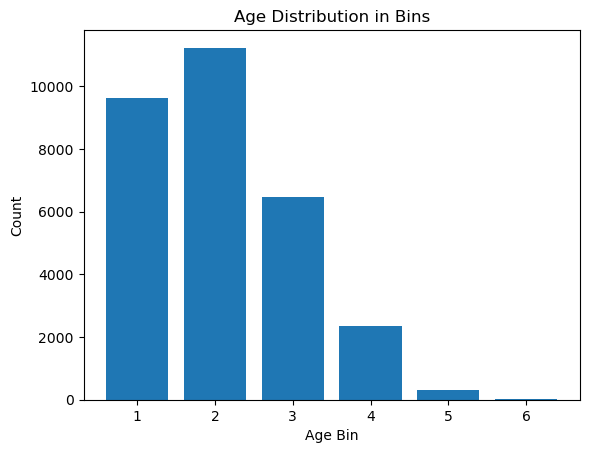

In [58]:
from pyspark.sql.functions import when, col
import matplotlib.pyplot as plt

# Define age bin conditions
age_bins = [
    (col("AGE") > 20) & (col("AGE") < 30),
    (col("AGE") >= 30) & (col("AGE") < 40),
    (col("AGE") >= 40) & (col("AGE") < 50),
    (col("AGE") >= 50) & (col("AGE") < 60),
    (col("AGE") >= 60) & (col("AGE") < 70),
    (col("AGE") >= 70) & (col("AGE") <= 80)
]

# Define corresponding age bin labels
age_bin_labels = [1, 2, 3, 4, 5, 6]

# Add a new column 'AgeBin' based on the conditions
df = df.withColumn("AgeBin", when(age_bins[0], age_bin_labels[0])
                    .when(age_bins[1], age_bin_labels[1])
                    .when(age_bins[2], age_bin_labels[2])
                    .when(age_bins[3], age_bin_labels[3])
                    .when(age_bins[4], age_bin_labels[4])
                    .when(age_bins[5], age_bin_labels[5])
                    .otherwise(0))

# Calculate the histogram of the 'AgeBin' column
hist_data = df.groupBy("AgeBin").count().orderBy("AgeBin")

# Convert the result to a Pandas DataFrame for plotting
hist_df = hist_data.toPandas()

# Plot the histogram
plt.bar(hist_df['AgeBin'], hist_df['count'])
plt.xlabel("Age Bin")
plt.ylabel("Count")
plt.title("Age Distribution in Bins")
plt.show()


In [59]:
corr_2_cols(df, 'AgeBin', 'def_pay').show()

+------+----+----+-------------------+
|AgeBin|   0|   1|               perc|
+------+----+----+-------------------+
|     1|7421|2197|0.22842586816385943|
|     6|  18|   7|               0.28|
|     3|4979|1485| 0.2297339108910891|
|     5| 225|  89|0.28343949044585987|
|     4|1759| 582|0.24861170439982913|
|     2|8962|2276|0.20252714006050898|
+------+----+----+-------------------+



In [61]:
# Define SE_AG conditions
se_ag_conditions = [
    (col("SEX") == 1) & (col("AgeBin") == 1),
    (col("SEX") == 1) & (col("AgeBin") == 2),
    (col("SEX") == 1) & (col("AgeBin") == 3),
    (col("SEX") == 1) & (col("AgeBin") == 4),
    (col("SEX") == 1) & (col("AgeBin") == 5),
    (col("SEX") == 2) & (col("AgeBin") == 1),
    (col("SEX") == 2) & (col("AgeBin") == 2),
    (col("SEX") == 2) & (col("AgeBin") == 3),
    (col("SEX") == 2) & (col("AgeBin") == 4),
    (col("SEX") == 2) & (col("AgeBin") == 5)
]

# Define corresponding SE_AG labels
se_ag_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Add a new column 'SE_AG' based on the conditions
df = df.withColumn("SE_AG", when(se_ag_conditions[0], se_ag_labels[0]) #man in 20's
                    .when(se_ag_conditions[1], se_ag_labels[1]) #man in 30's
                    .when(se_ag_conditions[2], se_ag_labels[2]) #man in 40's
                    .when(se_ag_conditions[3], se_ag_labels[3]) #man in 50's
                    .when(se_ag_conditions[4], se_ag_labels[4]) #man in 60's and above
                    .when(se_ag_conditions[5], se_ag_labels[5]) #mwoman in 20's
                    .when(se_ag_conditions[6], se_ag_labels[6]) #woman in 30's
                    .when(se_ag_conditions[7], se_ag_labels[7]) #woman in 40's
                    .when(se_ag_conditions[8], se_ag_labels[8]) #woman in 50's
                    .when(se_ag_conditions[9], se_ag_labels[9]) #woman in 60's and above
                    .otherwise(1))

corr_2_cols(df, 'SE_AG', 'def_pay').show()

+-----+----+----+-------------------+
|SE_AG|   0|   1|               perc|
+-----+----+----+-------------------+
|    1|2510| 796|0.24077434966727163|
|    6|4929|1408|0.22218715480511284|
|    3|2080| 691|0.24936845904005775|
|    5| 122|  44|0.26506024096385544|
|    9| 962| 287|0.22978382706164932|
|    4| 797| 295|0.27014652014652013|
|    8|2899| 794|  0.215001353912808|
|    7|5447|1226|0.18372546081222837|
|   10| 103|  45|0.30405405405405406|
|    2|3515|1050|0.23001095290251916|
+-----+----+----+-------------------+



In [62]:
from pyspark.sql.functions import when, col
from pyspark.sql import functions as F

# Define columns for months
months = ['6', '5', '4', '3', '2', '1']

# Loop through each month to create the corresponding 'Client_X' columns
for month in months:
    df = df.withColumn("Client_" + month, when(
        (col("PAY_" + month) == 0) &
        (col("BILL_AMT" + month) == 0) &
        (col("PAY_AMT" + month) == 0), 0
    ).otherwise(1))

# Calculate the count of clients for each month
client_counts = [df.filter(col("Client_" + month) == 1).count() for month in months]

# Create a PySpark DataFrame to display the results
result_df = spark.createDataFrame(list(zip(months, client_counts)), ["Month", "Client_Count"])

# Show the results
result_df.show()

+-----+------------+
|Month|Client_Count|
+-----+------------+
|    6|       26700|
|    5|       27247|
|    4|       27572|
|    3|       27810|
|    2|       28183|
|    1|       29477|
+-----+------------+



In [66]:
from pyspark.sql.functions import col

# Define the columns and perform the calculations
df = df.withColumn("Avg_exp_5", ((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_4", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) / 2) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_3", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) / 3) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_2", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) +
                 (col("BILL_AMT2") - (col("BILL_AMT3") - col("PAY_AMT2"))) / 4) / col("LIMIT_BAL")))
df = df.withColumn("Avg_exp_1", (((col("BILL_AMT5") - (col("BILL_AMT6") - col("PAY_AMT5"))) +
                 (col("BILL_AMT4") - (col("BILL_AMT5") - col("PAY_AMT4"))) +
                 (col("BILL_AMT3") - (col("BILL_AMT4") - col("PAY_AMT3"))) +
                 (col("BILL_AMT2") - (col("BILL_AMT3") - col("PAY_AMT2"))) +
                 (col("BILL_AMT1") - (col("BILL_AMT2") - col("PAY_AMT1"))) / 5) / col("LIMIT_BAL")))

# Select the columns of interest and sample 20 rows
result_df = df.select("LIMIT_BAL", "Avg_exp_5", "BILL_AMT5", "Avg_exp_4", "BILL_AMT4",
                      "Avg_exp_3", "BILL_AMT3", "Avg_exp_2", "BILL_AMT2", "Avg_exp_1",
                      "BILL_AMT1", "def_pay").sample(withReplacement=False, fraction=0.1, seed=42)

# Show the resulting DataFrame
result_df.toPandas()


,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
0,100000,0.009610,-159,0.014415,221,0.020487,601,0.023970,380,0.050572,11876,0
1,20000,0.022550,17905,0.033375,18338,0.054033,17428,0.080975,18010,0.108460,15376,1
2,360000,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0
3,70000,0.011386,38659,0.016843,39423,0.026738,38355,0.038886,36171,0.051189,37042,1
4,200000,0.002430,700,0.003595,1166,0.005287,782,0.006735,1098,0.008409,1587,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,220000,0.001200,528,0.001800,292,0.002800,264,0.003900,264,0.005040,528,0
2987,180000,0.062861,1415,0.100319,14834,0.166233,28674,0.247522,44638,0.330443,51323,0
2988,50000,0.095540,19971,0.429430,50360,0.790233,49397,0.862690,49123,0.938080,43998,0
2989,100000,0.164690,69473,0.185455,70626,0.327453,102996,0.595457,1427,0.679300,3042,0


In [67]:
# Create the 'Closeness_X' columns
for month in range(1, 7):
    df = df.withColumn(f"Closeness_{month}", (col("LIMIT_BAL") - col(f"BILL_AMT{month}")) / col("LIMIT_BAL"))


In [68]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_1: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- def_pay: integer (nullable = tru

In [69]:
df.toPandas()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6
0,1,20000,2,2,1,24,2,2,0,0,...,0.000000,0.011483,0.073225,0.197660,0.804350,0.844900,0.965550,1.000000,1.000000,1.000000
1,2,120000,2,2,2,26,0,2,0,0,...,0.005021,0.009564,0.011931,0.013795,0.977650,0.985625,0.977650,0.972733,0.971208,0.972825
2,3,90000,2,2,2,34,0,0,0,0,...,0.006561,0.009533,0.016689,0.070267,0.675122,0.844144,0.849344,0.840767,0.833911,0.827233
3,4,50000,2,2,1,37,0,0,0,0,...,0.014170,0.166567,0.467065,0.484508,0.060200,0.035340,0.014180,0.433720,0.420820,0.409060
4,5,50000,1,2,1,57,0,0,0,0,...,0.122020,0.395927,0.760440,0.877968,0.827660,0.886600,0.283300,0.581200,0.617080,0.617380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,0.228018,0.553905,0.938852,0.958235,0.141145,0.123568,0.052886,0.599982,0.858014,0.927364
29996,29997,150000,1,3,2,43,0,0,0,0,...,0.047660,0.068544,0.087280,0.098796,0.988780,0.987813,0.976653,0.940140,0.965400,1.000000
29997,29998,30000,1,2,2,37,4,3,2,0,...,0.182433,0.300478,0.391683,0.408027,0.881167,0.888133,0.908067,0.304067,0.313933,0.354767
29998,29999,80000,1,3,1,41,1,0,0,0,...,0.466219,0.836950,1.059988,1.126090,1.020563,0.020262,0.046200,0.340325,0.851812,0.388200


### Unbalanced Target Variable

In [70]:
class_counts = df.groupBy("def_pay").count()
class_counts.show()

+-------+-----+
|def_pay|count|
+-------+-----+
|      1| 6636|
|      0|23364|
+-------+-----+



In [81]:
temp_df=df.toPandas()
temp_df.shape

(30000, 45)

In [72]:
df1=df # create a temporary copy of the orginal dataframe so that any changes in the temporary one will not affect the orginal dataframe.

In [74]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
from imblearn.over_sampling import SMOTE
from pyspark.sql.functions import col

# Define the target column name
target_column = 'def_pay'

# Select the feature columns and target column
feature_columns = [col_name for col_name in df1.columns if col_name != target_column]
df1 = df1.select(feature_columns + [target_column])

# Convert the PySpark DataFrame to a pandas DataFrame
pandas_df = df1.toPandas()

# Apply SMOTE on the pandas DataFrame
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(pandas_df[feature_columns], pandas_df[target_column])

# Create a new pandas DataFrame with resampled data
resampled_df = pd.concat([pd.DataFrame(y_resampled, columns=[target_column]), pd.DataFrame(X_resampled, columns=feature_columns)], axis=1)

# Convert the resampled pandas DataFrame back to a PySpark DataFrame
resampled_df_spark = spark.createDataFrame(resampled_df)

# Display the class distribution after SMOTE
class_distribution = resampled_df_spark.groupBy(target_column).count()
class_distribution.show()

+-------+-----+
|def_pay|count|
+-------+-----+
|      0|23364|
|      1|23364|
+-------+-----+



In [80]:
resampled_df_spark.groupBy('def_pay_smote').count().show()

+-------------+-----+
|def_pay_smote|count|
+-------------+-----+
|            0|23364|
|            1|23364|
+-------------+-----+



In [84]:
resampled_df_spark.toPandas().shape

(46728, 46)

In [85]:
resampled_df_spark.toPandas().head(10)

,def_pay,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,def_pay_smote
0,1,1,20000,2,2,1,24,2,2,0,...,0.011483,0.073225,0.197660,0.804350,0.844900,0.965550,1.000000,1.000000,1.000000,1
1,1,2,120000,2,2,2,26,0,2,0,...,0.009564,0.011931,0.013795,0.977650,0.985625,0.977650,0.972733,0.971208,0.972825,1
2,0,3,90000,2,2,2,34,0,0,0,...,0.009533,0.016689,0.070267,0.675122,0.844144,0.849344,0.840767,0.833911,0.827233,0
3,0,4,50000,2,2,1,37,0,0,0,...,0.166567,0.467065,0.484508,0.060200,0.035340,0.014180,0.433720,0.420820,0.409060,0
4,0,5,50000,1,2,1,57,0,0,0,...,0.395927,0.760440,0.877968,0.827660,0.886600,0.283300,0.581200,0.617080,0.617380,0
5,0,6,50000,1,1,2,37,0,0,0,...,0.286540,0.811200,0.869664,-0.288000,-0.141380,-0.152160,0.612120,0.607620,0.599520,0
6,0,7,500000,1,1,2,29,0,0,0,...,0.165632,0.089612,0.104513,0.264070,0.175954,0.109986,-0.085306,0.033994,0.052112,0
7,0,8,100000,2,2,2,23,0,0,0,...,0.020487,0.023970,0.050572,0.881240,0.996200,0.993990,0.997790,1.001590,0.994330,0
8,0,9,140000,2,3,1,28,0,0,2,...,0.075726,0.080843,0.092233,0.919393,0.899314,0.913514,0.912779,0.915764,0.973436,0
9,0,10,20000,1,3,2,35,0,0,0,...,0.010850,0.010850,0.010850,1.000000,1.000000,1.000000,1.000000,0.349650,0.304400,0


In [86]:
# Drop the column def_pay. As def_pay and def_pay_smote are both same column.
df_spark_new = resampled_df_spark.drop('def_pay')
df_spark_new.printSchema()

root
 |-- ID: long (nullable = true)
 |-- LIMIT_BAL: long (nullable = true)
 |-- SEX: long (nullable = true)
 |-- EDUCATION: long (nullable = true)
 |-- MARRIAGE: long (nullable = true)
 |-- AGE: long (nullable = true)
 |-- PAY_1: long (nullable = true)
 |-- PAY_2: long (nullable = true)
 |-- PAY_3: long (nullable = true)
 |-- PAY_4: long (nullable = true)
 |-- PAY_5: long (nullable = true)
 |-- PAY_6: long (nullable = true)
 |-- BILL_AMT1: long (nullable = true)
 |-- BILL_AMT2: long (nullable = true)
 |-- BILL_AMT3: long (nullable = true)
 |-- BILL_AMT4: long (nullable = true)
 |-- BILL_AMT5: long (nullable = true)
 |-- BILL_AMT6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: long (nullable = true)
 |-- SE_MA: long (nullable = true)
 |-- AgeBin: long (nullable = true)
 |-- SE_AG: long (nullable = true)
 |-

## Train, Test split

In [90]:
from pyspark.sql.functions import col, sum

# Check for null values in each column
null_counts = df_spark_new.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark_new.columns])

# Display the counts of null values in each column
null_counts.show()


+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-----+------+-----+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_1|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|SE_MA|AgeBin|SE_AG|Client_6|Client_5|Client_4|Client_3|Client_2|Client_1|Avg_exp_5|Avg_exp_4|Avg_exp_3|Avg_exp_2|Avg_exp_1|Closeness_1|Closeness_2|Closeness_3|Closeness_4|Closeness_5|Closeness_6|def_pay_smote|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+----

In [91]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay_smote']
target_label = 'def_pay_smote'

### Logistic Regression

In [92]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol=target_label)

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_label)
area_under_curve = evaluator.evaluate(predictions)
print(f"Area Under ROC Curve: {area_under_curve}")

Area Under ROC Curve: 0.8684346483176747


### Classification Metrics: Accuracy, Precision, Recall, F1 score, confusion Matrix

In [93]:
# Confusion Matrix
true_positive = predictions[(predictions[target_label] == 1) & (predictions['prediction'] == 1)].count()
false_positive = predictions[(predictions[target_label] == 0) & (predictions['prediction'] == 1)].count()
true_negative = predictions[(predictions[target_label] == 0) & (predictions['prediction'] == 0)].count()
false_negative = predictions[(predictions[target_label] == 1) & (predictions['prediction'] == 0)].count()

confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

# Accuracy, Precision, Recall, and F1-Score
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Confusion Matrix:
[5062, 908]
[1932, 5982]
Accuracy: 0.7954479976951887
Precision: 0.8479061976549414
Recall: 0.7237632256219617
F1-Score: 0.7809318111693921


In [94]:
area_under_pr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area Under Precision-Recall Curve: {area_under_pr}")

Area Under Precision-Recall Curve: 0.8909705869866685


### Plots ROC and area under PR curve

In [101]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Extract raw predictions and labels
raw_predictions = predictions.select("rawPrediction").rdd.map(lambda row: row[0].toArray())
labels = predictions.select(target_label).rdd.map(lambda row: row[0])

In [103]:
import numpy as np

# Convert raw predictions and labels to NumPy arrays
raw_predictions = np.array(raw_predictions.collect())
labels = np.array(labels.collect())


In [104]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(labels, raw_predictions[:, 1])
roc_auc = auc(fpr, tpr)

In [105]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(labels, raw_predictions[:, 1])
average_precision = average_precision_score(labels, raw_predictions[:, 1])


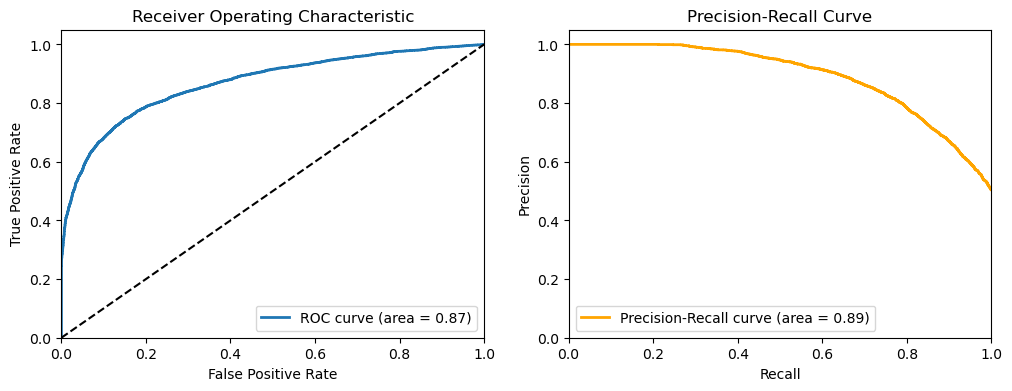

In [108]:
# Plot ROC curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})', color='orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

### Support Vector Machines

In [112]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay_smote']
target_label = 'def_pay_smote'

In [115]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a LinearSVC model
svm = LinearSVC(featuresCol="features", labelCol=target_label, maxIter=50)
svm_model = svm.fit(train_data)

# Make predictions on the test data
predictions = svm_model.transform(test_data)

# Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol=target_label, metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Prediction Accuracy:", accuracy)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy: 0.7900460962258715
Confusion Matrix:
[[6050  840]
 [2075 4919]]


In [117]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol=target_label, predictionCol="prediction")

# Calculate precision
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
print(f"Precision: {precision}")

# Calculate recall
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
print(f"Recall: {recall}")

# Calculate F1 score
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print(f"F1 Score: {f1}")

# AUC is not available in MulticlassClassificationEvaluator, you can calculate it using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_label)
auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC Curve (AUC): {auc}")


Precision: 0.7997885738850052
Recall: 0.7900460962258715
F1 Score: 0.7885146003896647
Area Under ROC Curve (AUC): 0.8629065634943988


# Random Forest Classifier

In [120]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol=target_label, numTrees=100, maxDepth=5, seed=42)

# Fit the model to the training data
rf_model = rf.fit(train_data)

# Make predictions on the test data
rf_predictions = rf_model.transform(test_data)

# Create an evaluator for multiclass classification
evaluator = MulticlassClassificationEvaluator(labelCol=target_label, predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator.evaluate(rf_predictions, {evaluator.metricName: "accuracy"})
print(f"Accuracy: {accuracy}")

# Calculate weighted precision
precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
print(f"Precision: {precision}")

# Calculate weighted recall
recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})
print(f"Recall: {recall}")

# Calculate weighted F1 score
f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
print(f" F1 Score: {f1}")

# caluclate AUC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
binary_evaluator_random = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_label)
auc = binary_evaluator_random.evaluate(rf_predictions, {binary_evaluator_random.metricName: "areaUnderROC"})
print(f" Area Under Curve: {auc}")


Accuracy: 0.7708153269951022
Precision: 0.7782652647808288
Recall: 0.7708153269951024
 F1 Score: 0.7694653866326708
 Area Under Curve: 0.8425363249361987


# Decision Tree Classifier

In [122]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay_smote']
target_label = 'def_pay_smote'

In [126]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)
test_data = assembler.transform(test_df)

# Create a LinearSVC model
dt = DecisionTreeClassifier(featuresCol="features", labelCol=target_label)
dt_model = dt.fit(train_data)

# Make predictions on the test data
dt_predictions = dt_model.transform(test_data)

# Evaluate the model using MulticlassClassificationEvaluator
evaluator_dt = MulticlassClassificationEvaluator(labelCol=target_label, metricName="accuracy")
accuracy = evaluator_dt.evaluate(dt_predictions)
print("Prediction Accuracy:", accuracy)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt_predictions.select("prediction").collect()
y_orig = dt_predictions.select(target_label).collect()
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy: 0.7203255545952175
Confusion Matrix:
[[4964 1926]
 [1957 5037]]


In [127]:
# Calculate precision
precision = evaluator_dt.evaluate(predictions, {evaluator_dt.metricName: "weightedPrecision"})
print(f"Precision: {precision}")

# Calculate recall
recall = evaluator_dt.evaluate(predictions, {evaluator_dt.metricName: "weightedRecall"})
print(f"Recall: {recall}")

# Calculate F1 score
f1 = evaluator_dt.evaluate(predictions, {evaluator_dt.metricName: "f1"})
print(f"F1 Score: {f1}")

# AUC is not available in MulticlassClassificationEvaluator, we can calculate it using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
binary_evaluator_dt = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol=target_label)
auc = binary_evaluator_dt.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC Curve (AUC): {auc}")


Precision: 0.7203393034097807
Recall: 0.7203255545952175
F1 Score: 0.7203288379675612
Area Under ROC Curve (AUC): 0.6129455249430054


# Multilayer Perceptron

In [132]:
# Split the data into training and testing sets using randomSplit
train_df, test_df = df_spark_new.randomSplit([0.7, 0.3], seed=42)

# Define features (all columns except 'def_pay_smote') and the target label
features = [col for col in df_spark_new.columns if col != 'def_pay_smote']
target_label = 'def_pay_smote'

In [143]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Create a VectorAssembler to assemble features
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_data = assembler.transform(train_df)  # Assuming you have a train DataFrame

# Define the layers for the MLP
# For example, 3 input features, 2 hidden layers with 5 nodes each, and 3 output classes
layers = [len(features), 5, 5, 3]

# Create an MLP classifier
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol=target_label, layers=layers)

# Fit the model to the training data
mlp_model = mlp.fit(train_data)

# Make predictions on the test data
test_data = assembler.transform(test_df)  
mlp_predictions = mlp_model.transform(test_data)

# Define the evaluator
evaluator_mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# Create a MulticlassClassificationEvaluator for evaluating accuracy, precision, recall, and F1 score
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol=target_label, predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator_multiclass.evaluate(mlp_predictions, {evaluator_multiclass.metricName: "accuracy"})
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = evaluator_multiclass.evaluate(mlp_predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
print(f"Precision: {precision}")

# Calculate recall
recall = evaluator_multiclass.evaluate(mlp_predictions, {evaluator_multiclass.metricName: "weightedRecall"})
print(f"Recall: {recall}")

# Calculate F1 score
f1 = evaluator_multiclass.evaluate(mlp_predictions, {evaluator_multiclass.metricName: "f1"})
print(f"F1 Score: {f1}")



23/11/08 19:26:11 ERROR StrongWolfeLineSearch: Encountered bad values in function evaluation. Decreasing step size to 0.5
23/11/08 19:26:12 ERROR StrongWolfeLineSearch: Encountered bad values in function evaluation. Decreasing step size to 0.25


Accuracy: 0.49625468164794007
Precision: 0.24626870905749834
Recall: 0.49625468164794007
F1 Score: 0.3291802018440654
